In [ ]:
!pip install pandas
!pip install requests
!pip install bs4 as bs
!pip install plotly
!pip install dash pandas

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 35.3 MB/s eta 0:00:00


# ARTILHARIA EUROPEIA

In [ ]:
import pandas as pd
import requests
import bs4 as bs
import plotly.graph_objects as go

# Função para ler as tabelas de uma página web e retornar a lista de DataFrames
def read_html_tables(url):
    try:
        response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
        response.raise_for_status()
        soup = bs.BeautifulSoup(response.text, 'html.parser')
        tables = pd.read_html(str(soup))
        return tables
    except requests.exceptions.HTTPError as http_err:
        print(f'Erro HTTP: {http_err}')
        return None
    except requests.exceptions.RequestException as req_err:
        print(f'Erro ao fazer a requisição: {req_err}')
        return None
    except ValueError:
        print('Nenhuma tabela encontrada')
        return None

# Capturando os dados
header = {'User-Agent': 'Mozilla/5.0 (windows NT 10.0; win64; x64) Applewebkit/537.36 \ (KHTML, like Gecko) chrome/103.0.0.0 Safari/s37.36'}

url = r'https://www.espn.com.br/futebol/estatisticas/_/liga/ENG.1/temporada/2023'
Site_premier_league = requests.get(url, headers=header)

PremierLeague = read_html_tables(url)
if PremierLeague:
    artilharia_eng = pd.DataFrame(PremierLeague[0])
    assistencias_eng = pd.DataFrame(PremierLeague[1])
else:
    artilharia_eng = None
    assistencias_eng = None

url = 'https://www.espn.com.br/futebol/estatisticas/_/liga/eng.fa'
Site_FA_CUP = requests.get(url, headers=header)

FA_CUP = read_html_tables(url)
if FA_CUP:
    artilharia_FA_CUP = pd.DataFrame(FA_CUP[0])
    assistencias_FA_CUP = pd.DataFrame(FA_CUP[1])
else:
    artilharia_FA_CUP = None
    assistencias_FA_CUP = None

url = r'https://www.espn.com.br/futebol/estatisticas/_/liga/ESP.1/temporada/2023'
SITE_LALIGA = requests.get(url, headers=header)

Laliga = read_html_tables(url)
if Laliga:
    artilharia_esp = pd.DataFrame(Laliga[0])
    assistencias_esp = pd.DataFrame(Laliga[1])
else:
    artilharia_esp = None
    assistencias_esp = None

url = 'https://www.espn.com.br/futebol/estatisticas/_/liga/esp.copa_del_rey'
SITE_COPA_RET = requests.get(url, headers=header)

copa_rey = read_html_tables(url)
if copa_rey:
    artilharia_rey = pd.DataFrame(copa_rey[0])
    assistencias_rey = pd.DataFrame(copa_rey[1])
else:
    artilharia_rey = None
    assistencias_rey = None

url = r'https://www.espn.com.br/futebol/estatisticas/_/liga/ITA.1/temporada/2023'
SITE_CALCIO = requests.get(url, headers=header)

Calcio = read_html_tables(url)
if Calcio:
    artilharia_ita = pd.DataFrame(Calcio[0])
    assistencias_ita = pd.DataFrame(Calcio[1])
else:
    artilharia_ita = None
    assistencias_ita = None

url = 'https://www.espn.com.br/futebol/estatisticas/_/liga/ita.coppa_italia'
SITE_CALCIO_CUP = requests.get(url, headers=header)

Calcio_cup = read_html_tables(url)
if Calcio_cup:
    artilharia_calcio_cup = pd.DataFrame(Calcio_cup[0])
    assistencias_calcio_cup = pd.DataFrame(Calcio_cup[1])
else:
    artilharia_calcio_cup = None
    assistencias_calcio_cup = None

url = r'https://www.espn.com.br/futebol/estatisticas/_/liga/FRA.1/temporada/2023'
SITE_LEAGUE1 = requests.get(url, headers=header)

Ligue_1 = read_html_tables(url)
if Ligue_1:
    artilharia_fra = pd.DataFrame(Ligue_1[0])
    assistencias_fra = pd.DataFrame(Ligue_1[1])
else:
    artilharia_fra = None
    assistencias_fra = None

url ='https://www.espn.com.br/futebol/estatisticas/_/liga/fra.coupe_de_france'
SITE_FRANÇA_CUP = requests.get(url, headers=header)

Ligue_1_cup = read_html_tables(url)
if Ligue_1_cup:
    artilharia_fra_cup = pd.DataFrame(Ligue_1_cup[0])
    assistencias_fra_cup = pd.DataFrame(Ligue_1_cup[1])
else:
    artilharia_fra_cup = None
    assistencias_fra_cup = None

url = r'https://www.espn.com.br/futebol/estatisticas/_/liga/uefa.champions'
SITE_CHAMPIONS = requests.get(url, headers=header)

Champions = read_html_tables(url)
if Champions:
    artilharia_champions = pd.DataFrame(Champions[0])
    assistencias_champions = pd.DataFrame(Champions[1])
else:
    artilharia_champions = None
    assistencias_champions = None

url = r'https://www.espn.com.br/futebol/estatisticas/_/liga/uefa.europa'
SITE_EUROPA_LEAGUE = requests.get(url, headers=header)

Euro_league = read_html_tables(url)
if Euro_league:
    artilharia_euro_league = pd.DataFrame(Euro_league[0])
    assistencias_euro_league = pd.DataFrame(Euro_league[1])
else:
    artilharia_euro_league = None
    assistencias_euro_league = None

In [ ]:
# Concatenar os DataFrames verticalmente
assistencias_geral = pd.concat([assistencias_eng, assistencias_FA_CUP, assistencias_esp, assistencias_rey,
                              assistencias_ita, assistencias_calcio_cup, assistencias_fra, assistencias_fra_cup,
                              assistencias_champions, assistencias_euro_league])

# Agrupar por nome e somar os valores da coluna 'A'
assistencias_geral = assistencias_geral.groupby('Nome').sum().reset_index()

# Ordenar o DataFrame resultante com base na coluna 'A' em ordem decrescente
assistencias_geral.sort_values('A', ascending=False, inplace=True)

# Redefinir a coluna 'POS' para iniciar do número 1
assistencias_geral['POS'] = range(1, len(assistencias_geral) + 1)

# Reordenar as colunas
assistencias_geral = assistencias_geral[['POS', 'Nome', 'P', 'A']]

# Selecionar apenas os dez primeiros jogadores
top_10 = assistencias_geral.head(10)

# Inverter a ordem dos dados para exibir do maior para o menor
top_10 = top_10[::-1]


# Criar o gráfico de barras horizontais
fig = go.Figure(go.Bar(
    x=top_10['A'],  # Usando o número de gols como eixo x
    y=top_10['Nome'],  # Usando o nome do jogador como eixo y
    orientation='h',  # Definindo a orientação como horizontal
    marker=dict(color='red'),  # Alterando a cor das barras para vermelho
    text=top_10['A'],  # Definindo o texto como o número de gols
    textposition='auto',  # Posicionando o texto automaticamente
))

# Personalizar o layout do gráfico
fig.update_layout(
    title='Top 10 Assitentes',
    xaxis_title='Gols',
    yaxis_title='Jogador',
)

# Mostrar o gráfico
fig.show()

In [ ]:
# Concatenar os DataFrames verticalmente
artilharia_geral = pd.concat([artilharia_eng, artilharia_FA_CUP, artilharia_esp, artilharia_rey,
                              artilharia_ita, artilharia_calcio_cup, artilharia_fra, artilharia_fra_cup,
                              artilharia_champions, artilharia_euro_league])

# Agrupar por nome e somar os valores da coluna 'G'
artilharia_geral = artilharia_geral.groupby('Nome').sum().reset_index()

# Ordenar o DataFrame resultante com base na coluna 'G' em ordem decrescente
artilharia_geral.sort_values('G', ascending=False, inplace=True)

# Redefinir a coluna 'POS' para iniciar do número 1
artilharia_geral['POS'] = range(1, len(artilharia_geral) + 1)

# Reordenar as colunas
artilharia_geral = artilharia_geral[['POS', 'Nome', 'P', 'G']]

# Selecionar apenas os dez primeiros jogadores
top_10 = artilharia_geral.head(10)

# Inverter a ordem dos dados para exibir do maior para o menor
top_10 = top_10[::-1]


# Criar o gráfico de barras horizontais
fig = go.Figure(go.Bar(
    x=top_10['G'],  # Usando o número de gols como eixo x
    y=top_10['Nome'],  # Usando o nome do jogador como eixo y
    orientation='h',  # Definindo a orientação como horizontal
    marker=dict(color='red'),  # Alterando a cor das barras para vermelho
    text=top_10['G'],  # Definindo o texto como o número de gols
    textposition='auto',  # Posicionando o texto automaticamente
))

# Personalizar o layout do gráfico
fig.update_layout(
    title='Top 10 Artilharia',
    xaxis_title='Gols',
    yaxis_title='Jogador',
)

# Mostrar o gráfico
fig.show()

In [ ]:

# Supondo que você tenha definido os DataFrames de artilharia e assistências anteriormente

# Concatenar os DataFrames de artilharia e assistências verticalmente
Participacoes_geral = pd.concat([artilharia_geral, assistencias_geral])

# Agrupar por nome e somar os valores das colunas 'G' (gols) e 'A' (assistências)
Participacoes_geral = Participacoes_geral.groupby('Nome').sum().reset_index()

# Calcular o total de participações somando os gols e assistências
Participacoes_geral['Total'] = Participacoes_geral['G'] + Participacoes_geral['A']

# Ordenar o DataFrame combinado com base na coluna 'Total' (gols + assistências) em ordem decrescente
Participacoes_geral.sort_values('Total', ascending=False, inplace=True)

# Selecionar apenas os dez primeiros jogadores
top_10_participacoes = Participacoes_geral.head(10)

# Inverter a ordem dos dados para exibir do maior para o menor
top_10_participacoes = top_10_participacoes[::-1]

# Criar o gráfico de barras horizontais
fig = go.Figure(go.Bar(
    x=top_10_participacoes['Total'],  # Usando o número total de participações como eixo x
    y=top_10_participacoes['Nome'],  # Usando o nome do jogador como eixo y
    orientation='h',  # Definindo a orientação como horizontal
    marker=dict(color='red'),  # Alterando a cor das barras para vermelho
    text=top_10_participacoes['Total'],  # Definindo o texto como o número total de participações
    textposition='auto',  # Posicionando o texto automaticamente
))

# Personalizar o layout do gráfico
fig.update_layout(
    title='Top 10 Participações (Gols + Assistências)',
    xaxis_title='Total de Participações',
    yaxis_title='Jogador',
)

# Mostrar o gráfico
fig.show()

Gerando dashboard para Premier League


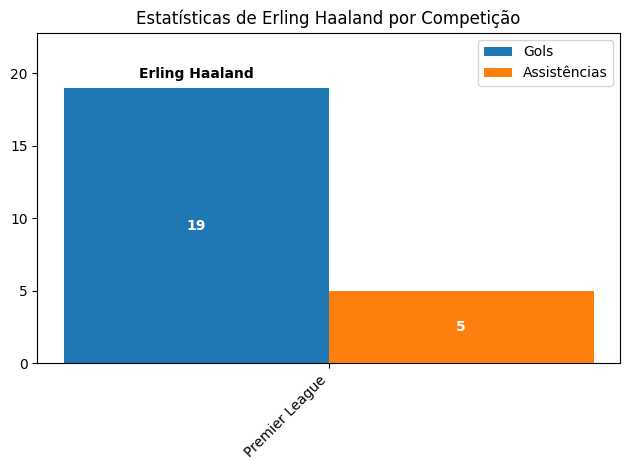

Gerando dashboard para FA Cup
Gerando dashboard para La Liga
Gerando dashboard para Copa del Rey
Gerando dashboard para Serie A
Gerando dashboard para Coppa Italia
Gerando dashboard para Ligue 1
Gerando dashboard para Coupe de France
Gerando dashboard para Champions League


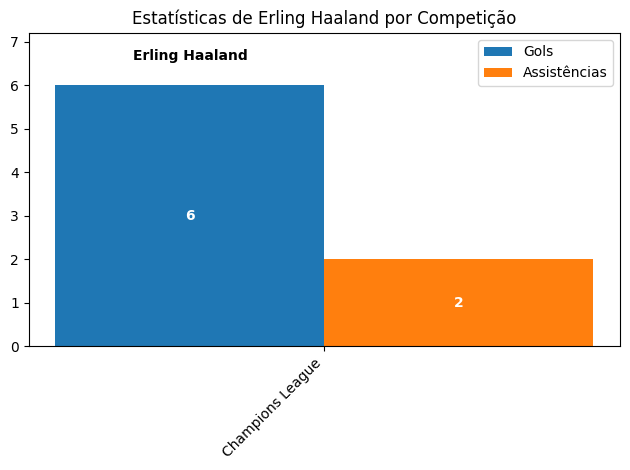

Gerando dashboard para Europa League


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def gerar_dashboard_haaland(ligas):
    for liga, (artilharia, assistencia) in ligas.items():
        print(f"Gerando dashboard para {liga}")
        try:
            gols = []
            assistencias_data = []

            # Filtrar dados de Erling Haaland
            haaland_artilharia = artilharia[artilharia['Nome'] == 'Erling Haaland']
            haaland_assistencia = assistencia[assistencia['Nome'] == 'Erling Haaland']

            # Verificar se há dados de gols e assistências
            if not haaland_artilharia.empty and not haaland_assistencia.empty:
                # Acumular dados de gols e assistências
                gols.append(haaland_artilharia['G'].sum())
                assistencias_data.append(haaland_assistencia['A'].sum())

                # Definir a largura das barras e a posição dos grupos de barras
                largura_barra = 0.30
                indice = np.arange(len([liga]))

                # Criar gráfico de barras apenas se houver competições com dados
                if [liga]:
                    # Criar gráfico de barras
                    fig, ax = plt.subplots()
                    barras_gols = ax.bar(indice - largura_barra/2, gols, largura_barra, label='Gols')
                    barras_assistencias = ax.bar(indice + largura_barra/2, assistencias_data, largura_barra, label='Assistências')

                    # Limitar a altura máxima das barras
                    altura_maxima = max(max(gols), max(assistencias_data))  # Obter o máximo de gols e assistências
                    ax.set_ylim(0, altura_maxima * 1.2)  # Definir o limite máximo como 20% maior que o máximo

                    # Adicionar números dentro das barras
                    for barras in [barras_gols, barras_assistencias]:
                        for barra in barras:
                            altura = barra.get_height()
                            largura = barra.get_width()
                            ax.text(barra.get_x() + largura/2, altura/2, '{}'.format(int(altura)),
                                    ha='center', va='center', color='white', fontweight='bold')

                    # Adicionar nome do jogador acima das barras
                    for i, competicao in enumerate([liga]):
                        ax.text(i - largura_barra/2, altura_maxima + 0.5, 'Erling Haaland',
                                ha='center', va='bottom', rotation=0, fontweight='bold')

                    # Adicionar nome da competição no eixo x
                    ax.set_title('Estatísticas de Erling Haaland por Competição')
                    ax.set_xticks(indice)
                    ax.set_xticklabels([liga], rotation=45, ha='right')
                    ax.legend()

                    # Mostrar gráfico
                    plt.tight_layout()
                    plt.show()
                else:
                    print("Não há dados disponíveis para gerar o gráfico.")
        except Exception as e:
            print(f"Erro ao gerar dashboard para {liga}: {e}")

# Criando um único dicionário com todas as ligas e seus respectivos dataframes de artilharia e assistências
ligas = {
    'Premier League': (artilharia_eng, assistencias_eng),
    'FA Cup': (artilharia_FA_CUP, assistencias_FA_CUP),
    'La Liga': (artilharia_esp, assistencias_esp),
    'Copa del Rey': (artilharia_rey, assistencias_rey),
    'Serie A': (artilharia_ita, assistencias_ita),
    'Coppa Italia': (artilharia_calcio_cup, assistencias_calcio_cup),
    'Ligue 1': (artilharia_fra, assistencias_fra),
    'Coupe de France': (artilharia_fra_cup, assistencias_fra_cup),
    'Champions League': (artilharia_champions, assistencias_champions),
    'Europa League': (artilharia_euro_league, assistencias_euro_league)
}

# Chamando a função para gerar os dashboards
gerar_dashboard_haaland(ligas)